# Задача 1

Найдите решение игры заданной матрицей $$A = \begin{bmatrix} 3 & 4 \\ 5 & 1 \end{bmatrix}$$

Нижняя цена игры:
$$\alpha(A)=\max\limits_{1\leq j\leq 2}\min\limits_{1\leq i\leq 2}a_{ij}=3.$$
Верхняя цена игры:
$$\beta(A)=\min\limits_{1\leq i\leq 2}\max\limits_{1\leq j\leq 2}a_{ij}=4.$$
Таким образом, $\alpha(A)\neq \beta(A)$. 

Реализуем программно данную проверку:

In [39]:
import numpy as np
A = np.array([[3, 4], [5, 1]])

def lower_bound_price(A):
        return A.min(axis=1).max()
    
def upper_bound_price(A):
        return A.max(axis=0).min()

In [40]:
lower_bound_price(A)

3

In [41]:
upper_bound_price(A)

4

In [42]:
lower_bound_price(A) == upper_bound_price(A)

False

Решать задачу будем в смешанных стратегиях.

Для первого игрока:
$$\begin{cases} 3p_1 + 4 p _2 = \nu,\\ 5p_1 + p_2 = \nu,\\ p_1 + p_2 = 1. \end{cases}$$
Для второго игрока:
$$\begin{cases} 3q_1 + 5q _2 = \nu,\\ 4q_1 + p_2 = \nu,\\ q_1 + q_2 = 1. \end{cases}$$
Построим программную реализацию решения данных СЛАУ. Матрицу системы для 1-го игрока обозначим через $P$, а матрицу системы для второго игрока через $Q$.

In [43]:
b = np.array([0, 0, 1])
P = np.append(np.append(A, [[-1],[-1]], axis=1), [[1, 1, 0]], axis = 0)
Q = np.append(np.append(A.T, [[-1],[-1]], axis=1), [[1, 1, 0]], axis = 0)

In [44]:
P

array([[ 3,  4, -1],
       [ 5,  1, -1],
       [ 1,  1,  0]])

In [45]:
Q

array([[ 3,  5, -1],
       [ 4,  1, -1],
       [ 1,  1,  0]])

Тогда решения систем уравнений будут иметь вид

In [46]:
np.linalg.solve(P, b)

array([0.6, 0.4, 3.4])

In [47]:
np.linalg.solve(Q, b)

array([0.8, 0.2, 3.4])

Таким образом, оптимальные смешанные стратегии и цена игры равны соответственно $$p = [0.6, 0.4],\quad q = [0.8, 0.2],\quad \nu = 3.4.$$

# Задача 2

Найдите решение игр, заданных матрицами $A_1$ и $A_2$:
$$A_1 = \begin{bmatrix} -2 & 3 & -2 & 3\\ 6 & -2 & 1 & 0 \end{bmatrix},\quad A_2 = \begin{bmatrix} 2 & 3 \\ 6 & -2 \\ 0 & 2\end{bmatrix}.$$

## Игра с матрицей $A_1$
Найдем решение игры для матрицы $A_1$. 
$$A_1 = \begin{bmatrix} -2 & 3 & -2 & 3\\ 6 & -2 & 1 & 0 \end{bmatrix}$$
Нижняя цена игры:
$$\alpha(A_1)=\max\limits_{1\leq j\leq 4}\min\limits_{1\leq i\leq 2}a_{ij}=-2.$$
Верхняя цена игры:
$$\beta(A_1)=\min\limits_{1\leq i\leq 2}\max\limits_{1\leq j\leq 4}a_{ij}=1.$$

In [49]:
A_1 = np.array([[-2, 3, -2, 3],
                [6, -2, 1, 0]])

lower_bound_price(A_1)

-2

In [50]:
upper_bound_price(A_1)

1

Таким образом, $\alpha(A_1)\neq \beta(A_1)$. Решать задачу будем в смешанных стратегиях графическим методом.

Предполагаем, что игрок 1 использует свою смешанную стратегию $$p^0 = (p_1, p_2)^T = (x, 1-x)^T,$$
а игрок 2 использует свою чистую стратегию $j$. Тогда средний выигрыш игрока 1 равен $$g_j(x) = x a_{j1} + (1-x) a_{j2}.$$
Чтобы нарисовать графики функций $y = g_j(x)$ на координатной плоскости $(x,y)$, мы проводим две вертикальных координатных оси, проходящие через точки $x=0$ и $x=1$.

Затем рисуем графики функций $$y = g_1(x) = -2x + 6(1-x),$$
$$y = g_2(x) = 3x -2(1-x),$$
$$y = g_3(x) = -2x + (1-x),$$
$$y = g_4(x) = 3x.$$
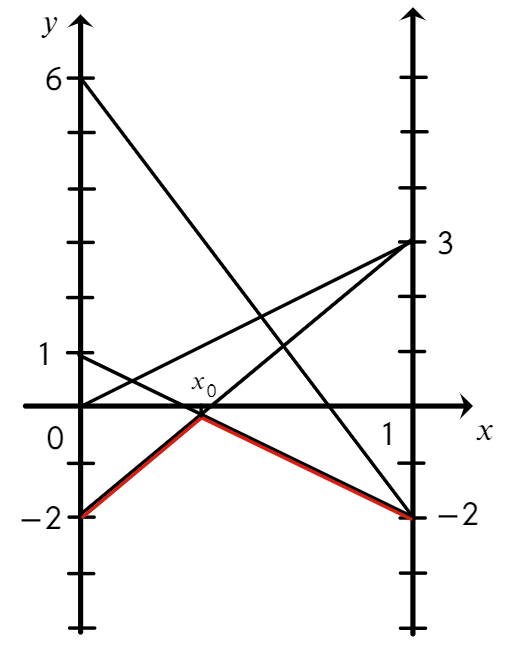
Функция $g(x) = \min_{j\in\{1,2,3,4\}} g_j(x)$ есть функция выигрышей игрока 1. Рисуем график $y=g(x)$ как нижнюю огибающую семейчтва прямых $y=g_j(x)$. Стремясь максимизировать свой выигрыщ, игрок 1 должен найти точку $x_0$ максимума функции $g(x)$. Тогда $(x_0,1-x_0)$ есть оптимальная стратегия игрока 1, $g(x_0)$ есть цена игры $\nu(A_1)$.

Точку $x_0$ можно вычислить как точку пересечения прямых $y=g_2(x)$ и $y=g_3(x)$. Тогда $$3x_0 -2(1-x_0) = -2x_0 + (1-x_0).$$
Выражая отсюда $x_0$, получим $$x_0 = \dfrac38.$$
Отсюда оптимальная смешанная стратегия игрока 1 $$p^0 = \left(\dfrac38, \dfrac58\right).$$
А цена игры высиялется как значение $g_2(x_0)$ или $g_3(x_0)$:
$$\nu(A_1)=g_2(x_0) = g_3(x_0) = -\dfrac18.$$
Теперь вычислим стратегию игрока 2. Использование неактивных стратегий не может увеличить выигрыш игрока 2. Если игрок 2 откажется от любой своей неактивной стратегии, то функция проигрышей игрока 1 может измениться, но минимум новой функции будет достигаться в той же самой точке $x_0$. Следовательно, можно считать, что игрок 1 применяет свои неактивные стратегии с нулевой вероятностью. В данном случае активными являются стратегии 2 и 3, а неактивными -- 1 и 4. Тогда
$$q_1 = q_4 = 0,\quad q_3 = 1-q_2.$$
Найдем $q^0$, решая игру с учесенной матрицей $$A' = \begin{bmatrix} 3 & -2 \\ -2 & 1\end{bmatrix},$$ которая получается путем обрасывания столбцов матрицы, соответствующих неактивным стратегиям 1 и 4. 

Зная, что $q_3 = 1-q_2$, по первой строке матрицы $A'$ мы можем построить уравнение $$3q_2 - 2(1-q_2) = -\dfrac18 = \nu(A_1).$$
Таким образом, $$q_2 = \dfrac38.$$
А отсюда имеем оптимальную стратегию игрока 2 равную $$q^0 = \left(0, \dfrac38, \dfrac58, 0\right)$$

## Игра с матрицей $A_2$
Найдем решение игры для матрицы $A_2$.
$$A_2 = \begin{bmatrix} 2 & 3 \\ 6 & -2 \\ 0 & 2\end{bmatrix}.$$
Нижняя цена игры:
$$\alpha(A_2)=\max\limits_{1\leq j\leq 4}\min\limits_{1\leq i\leq 2}a_{ij}=2.$$
Верхняя цена игры:
$$\beta(A_2)=\min\limits_{1\leq i\leq 2}\max\limits_{1\leq j\leq 4}a_{ij}=3.$$

In [52]:
A_2 = np.array([[2, 3],
                [6, -2],
                [0, 2]])

lower_bound_price(A_2)

2

In [53]:
upper_bound_price(A_2)

3

Таким образом, $\alpha(A_2)\neq \beta(A_2)$. Решать задачу будем в смешанных стратегиях графическим методом.

Предполагаем, что игрок 2 использует свою смешанную стратегию $$q^0 = (q_1, q_2)^T = (x, 1-x)^T,$$
а игрок 1 использует свою чистую стратегию $i$. Тогда средний выигрыш игрока 1 2 равен $$g_i(x) = x a_{i1} + (1-x) a_{i2}.$$
Чтобы нарисовать графики функций $y = g_i(x)$ на координатной плоскости $(x,y)$, мы проводим две вертикальных координатных оси, проходящие через точки $x=0$ и $x=1$.

Затем рисуем графики функций 
$$y = g_1(x) = 2x + 3(1-x),$$
$$y = g_2(x) = 6x -2(1-x),$$
$$y = g_3(x) = 2(1-x),$$
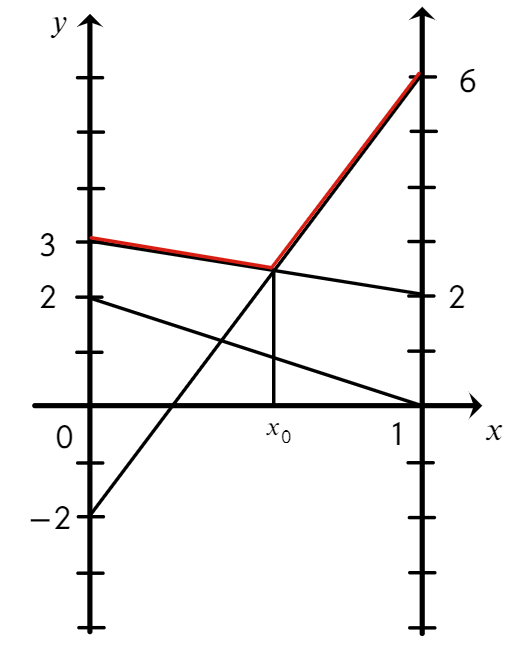
Функция $g(x) = \max_{i\in\{1,2,3\}} g_i(x)$ есть функция проигрышей игрока 2. Рисуем график $y=g(x)$ как нижнюю огибающую семейчтва прямых $y=g_j(x)$. Стремясь минимизировать свой проигрыш, игрок 2 должен найти точку $x_0$ минимума функции $g(x)$. Тогда $(x_0,1-x_0)$ есть оптимальная стратегия игрока 1, $g(x_0)$ есть цена игры $\nu(A_2)$.

Точку $x_0$ можно вычислить как точку пересечения прямых $y=g_1(x)$ и $y=g_2(x)$. Тогда $$2x_0  + 3(1-x_0) = 6x_0 -2(1-x_0).$$
Выражая отсюда $x_0$, получим $$x_0 = \dfrac59.$$
Отсюда оптимальная смешанная стратегия игрока 2 $$q^0 = \left(\dfrac59, \dfrac49\right).$$
А цена игры вычисляется как значение $g_1(x_0)$ или $g_2(x_0)$:
$$\nu(A_2)=g_1(x_0) = g_2(x_0) = \dfrac{22}9.$$
Теперь вычислим стратегию игрока 1. В данном случае активными являются стратегии 1 и 2, а неактивными -- 3. Тогда
$$p_2 = 1-p_1, \quad p_3 = 0.$$
Найдем $p^0$, решая игру с учесенной матрицей $$A' = \begin{bmatrix} 2 & 3 \\ 6 & -2\end{bmatrix},$$ которая получается путем обрасывания строки матрицы, соответствующей неактивной стратегии 3. 

Зная, что $p_2 = 1-p_1$, по первой строке матрицы $A'$ мы можем построить уравнение $$2p_1  + 3(1-p_1) = \dfrac{22}9 = \nu(A_2).$$
Таким образом, $$p_1 = \dfrac59.$$
А отсюда имеем оптимальную стратегию игрока 1 равную $$p^0 = \left(\dfrac59, \dfrac49, 0\right).
$$

# Задача 3

Планирование посева.
\begin{enumerate} 
  \item Фермеру необходимо определить, в каких пропорциях сеять свое поле $5$ культурами, если урожайность этих культур, а, значит, и прибыль, зависят от того, каким будет лето: прохладным и дождливым, нормальным, или жарки и сухим.
  \item Фермер подсчитал чистую прибыль с $1$ га от разных культур в зависимости от погоды:\\
\begin{tabular}{ |p{2.5cm}|p{2cm}|p{2cm}|p{2cm}|p{2cm}|p{2cm}|}
 \hline
  & погода $1$ & погода $2$ & погода $3$ & погода $4$ & погода $5$  \\
 \hline
 Культура 1& 2 & 4 & 1 & 4 & 2\\
  \hline
 Культура 2& 1 & 3 & 2 & 2 & 4\\
  \hline
 Культура 3& 3 & 2 & 5 & 2 & 3\\
  \hline
 Культура 4& 1 & 3 & 2 & 5 & 2\\
  \hline
 Культура 5& 2 & 1 & 3 & 3 & 2\\
 \hline
\end{tabular}
\item здесь  фермера нет реального противника.
\item Но, если фермер планирует свою деятельность в расчете на наихудшие погодные условия, то можно считать Природу активным субъектом, который пытается создать наихудшую (с точки зрения фермера) погоду.
\item В таком случае, мы можем смоделировать задачу фермера как матричную игру, в которой фермер является игроком 1, а Природа -- игроком 2.
\item Матрица $A$ выигрышей в данной игре -- это таблица доходов фермера.
\end{enumerate}

Построим матрицу, соответствующую условию задачи:
$$A = \begin{bmatrix}
 2 & 4 & 1 & 4 & 2\\
1 & 3 & 2 & 2 & 4\\
3 & 2 & 5 & 2 & 3\\
1 & 3 & 2 & 5 & 2\\
2 & 1 & 3 & 3 & 2\\
\end{bmatrix}.$$
Вычислим нижнюю и верхнюю цены игры.

In [59]:
A = np.array([[2, 4, 1, 4, 2],
              [1, 3, 2, 2, 4],
              [3, 2, 5, 2, 3],
              [1, 3, 2, 5, 2],
              [2, 1, 3, 3, 2]])

lower_bound_price(A)

2

In [58]:
upper_bound_price(A)

3

Таким образом, $\alpha(A) = 2 < 3 = \beta(A)$, то есть игра не имеет решения в чистых стратегиях.

Решим игру в смешанныз стратегиях. Поскольку $\alpha = 2>0$, то матрицу $A$ не нужно модифицировать. 

Сведем решение матричной игры к решению задачи линейного программирования. Запишем получившуюся задачу линейного программирования:
$$x_1 + x_2 + x_3 + x_4 + x_5 \to \max$$
$$\begin{cases}
2x_1 +4x_2 +x_3 +4x_4 +2x_5 \leq 1,\\
x_1 +3x_2 +2x_3 +2x_4 +4x_5 \leq 1,\\
3x_1 + 2x_2 + 5x_3 + 2x_4 + 3x_5 \leq 1,\\
x_1 + 3x_2 + 2x_3 + 5x_4 + 2x_5 \leq 1,\\
2x_1 + 1x_2 + 3x_3 + 3x_4 + 2x_5 \leq 1,\\
\end{cases}$$
$$x_1, x_2, x_3, x_4, x_5 \geq 0.$$

С помощью библиотеки OR-Tools найдем решение данной задачи линейного программирования

In [73]:
#!pip install ortools

In [93]:
from ortools.linear_solver import pywraplp


def create_data_model():
    data = {}
    data["constraint_coeffs"] = [
            [2, 4, 1, 4, 2],
            [1, 3, 2, 2, 4],
            [3, 2, 5, 2, 3],
            [1, 3, 2, 5, 2],
            [2, 1, 3, 3, 2],
    ]
    data["bounds"] = [1, 1, 1, 1, 1]
    data["obj_coeffs"] = [1, 1, 1, 1, 1]
    data["num_vars"] = 5
    data["num_constraints"] = 5
    return data


def LinearProgramming():
    data = create_data_model()
    solver = pywraplp.Solver.CreateSolver("GLOP")
    if not solver:
        return

    infinity = solver.infinity()
    x = {}
    for j in range(data["num_vars"]):
        x[j] = solver.IntVar(0, infinity, "x[%i]" % (j+1))

    for i in range(data['num_constraints']):
        constraint_expr = [data['constraint_coeffs'][i][j] * x[j] for j in range(data['num_vars'])]
        solver.Add(sum(constraint_expr) <= data['bounds'][i])

    objective = solver.Objective()
    for j in range(data["num_vars"]):
        obj_expr = [data['obj_coeffs'][j] * x[j] for j in range(data['num_vars'])]
    solver.Maximize(solver.Sum(obj_expr))

    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Objective value =", solver.Objective().Value())
        for j in range(data["num_vars"]):
            print(x[j].name(), " = ", x[j].solution_value())
        print()
        print(f"Problem solved in {solver.iterations():d} iterations")
    else:
        print("The problem does not have an optimal solution.")

LinearProgramming()

Solving with Glop solver v9.9.3963
Objective value = 0.375
x[1]  =  0.25
x[2]  =  0.125
x[3]  =  0.0
x[4]  =  0.0
x[5]  =  0.0

Problem solved in 2 iterations


Составим задачу линейного программирования двойственную к составленной нами ранее
$$y_1 + y_2 + y_3 + y_4 + y_5 \to \min$$
$$\begin{cases}
2y_1 +4y_2 +y_3 +4y_4 +2y_5 \geq 1,\\
y_1 +3y_2 +2y_3 +2y_4 +4y_5 \geq 1,\\
3y_1 + 2y_2 + 5y_3 + 2y_4 + 3y_5 \geq 1,\\
y_1 + 3y_2 + 2y_3 + 5y_4 + 2y_5 \geq 1,\\
2y_1 + 1y_2 + 3y_3 + 3y_4 + 2y_5 \geq 1,\\
\end{cases}$$
$$y_1, y_2, y_3, y_4, y_5 \geq 0.$$
Также с помощью OR-Tools найдем решение двойственной задачи ЛП.

In [94]:
def DualLinearProgramming():
    data = create_data_model()
    solver = pywraplp.Solver.CreateSolver("GLOP")
    if not solver:
        return

    infinity = solver.infinity()
    y = {}
    for j in range(data["num_vars"]):
        y[j] = solver.IntVar(0, infinity, "y[%i]" % (j+1))

    for i in range(data['num_constraints']):
        constraint_expr = [data['constraint_coeffs'][i][j] * y[j] for j in range(data['num_vars'])]
        solver.Add(sum(constraint_expr) >= data['bounds'][i])

    objective = solver.Objective()
    for j in range(data["num_vars"]):
        obj_expr = [data['obj_coeffs'][j] * y[j] for j in range(data['num_vars'])]
    solver.Minimize(solver.Sum(obj_expr))

    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Objective value =", solver.Objective().Value())
        for j in range(data["num_vars"]):
            print(y[j].name(), " = ", y[j].solution_value())
        print()
        print(f"Problem solved in {solver.iterations():d} iterations")
    else:
        print("The problem does not have an optimal solution.")

DualLinearProgramming()

Solving with Glop solver v9.9.3963
Objective value = 0.375
y[1]  =  0.0
y[2]  =  0.0
y[3]  =  0.08333333333333338
y[4]  =  0.16666666666666666
y[5]  =  0.12499999999999997

Problem solved in 5 iterations


Итого имеем оптимальное решение исходной и двойственной к ней задач
$$x^0 = \begin{bmatrix} 0.25 \\ 0.125 \\ 0 \\ 0\\ 0\end{bmatrix},\quad y^0 = \begin{bmatrix} 0 \\ 0 \\ \frac{1}{12} \\ \frac{1}{6} \\ \frac{1}8\end{bmatrix}$$
Найдем цену игры:
$$\nu(A) = \dfrac{1}{y_1^0 + y_2^0 + y_3^0 + y_4^0 + y_5^0} = \dfrac{1}{\frac{2}{24} + \frac{4}{24} + \frac{3}{24}} = \dfrac{24}{9}\approx 2.67.$$

Тогда оптимальная стратегия игрока 1 равна $$p^0 = \nu(A) y^0 = \left(0, 0, \dfrac29, \dfrac49, \dfrac39\right).$$
Оптимальная стратегия игрока 2 (природы) равна $$q^0 = \nu(A) x^0 = \left(\dfrac23, \dfrac13, 0, 0, 0\right).$$

Таким образом, смешанная стратегия рекомендует фермеру засеять $2/9$ поля культурной 3, $3/9$ культурой 4, $4/9$ культурой 5. При любой погоде доход фермера будет не меньшим цены $\nu(A) = \dfrac{24}9$ данной игры.

# Задача 4

Магазин имеет некоторый запас товаров ассортиментного минимума. Если
запас товаров недостаточен, то необходимо завести его с базы; если запас превышает спрос, то
магазин несет расходы по хранению нереализованного товара. Пусть спрос на товары лежит в
пределах $S$ ($5 \leq S \leq 8$ единиц), расходы по хранению одной единицы товара составляют $c$ руб., а
расходы по завозу единицы товара $k$ руб., цена за единицу товара составляет $p$ руб. Составить
платежную матрицу, элементами которой является прибыль магазина (доход от продажи с
учетом расходов по хранению или по завозу). Определить оптимальную стратегию магазина
по завозу товаров, используя критерии Вальда, Сэвиджа, Гурвица при $\alpha = 0.5$, Лапласа.

В соответствии с вариантом входные данные:

- $p=350$ -- цена за единицу товара;

- $c=60$ -- расход по хранению одной единицы товара;

- $k=70$ -- расходы по завозу одной единицы товара.

Матрица в общем виде, где по горизонтали необходимое количество товара, а по вертикали количество товара, которое есть в наличие, при условии, что количество товара изменяется от $5$ до $8$, имеет вид:
$$\begin{bmatrix}
    5p & 6p-k & 7p-2k & 8p-3k\\
    5p-c & 6p & 7p-k & 8p-2k\\
    5p-2c & 6p-c & 7p & 8p-k\\
    5p-3c & 6p-2c & 7p-c & 8p
\end{bmatrix}$$

Вычислим программно вид матрицы при подставленных входных данных:

In [143]:
def init_matrix(p, c, k):
    n = 4
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i, j] = (5+i)*p
            for l in range(1, 4):
                if i == j-l:
                    matrix[i, j] = (5+j)*p - l*k
            for l in range(1, 4):
                if i == j+l:
                    matrix[i, j] = (5+j)*p - l*c
    return matrix

In [184]:
C = init_matrix(300, 50, 70)
B = init_matrix(210, 20, 60)
A = init_matrix(350, 60, 70)
A

array([[1750., 2030., 2310., 2590.],
       [1690., 2100., 2380., 2660.],
       [1630., 2040., 2450., 2730.],
       [1570., 1980., 2390., 2800.]])

Воспользуемся критерием Вальда:
$$W=\max\limits_i\min\limits_j a_{ij}.$$
Программно реализуем функцию, которая будет вычислять значение W.

In [158]:
def W(A):
        return A.min(axis=1).max()
    
W(A)

1750.0

То есть оптимальная стратегия -- завоз 5 единиц.

Воспользуемся критерием Сэвиджа $$S=\min\limits_i\max\limits_j r_{ij}$$
$$b_j=\max\limits_i a_{ij}$$
$$r_{ij}=b_j-a_{ij}=a_{\max j}-a_{ij}$$

Составим компьютерный метод, который будем вычислять по соответствующим формулам матрицу $(r_{ij})$ и находить число $S$.

In [203]:
def S(A):
    r = np.array(A.shape)
    b = A.max(axis=1)
    r = np.array([b for _ in range(4)]) - A
    S = r.max(axis=1).min()
    return r, S

In [204]:
S(A)

(array([[ 840.,  630.,  420.,  210.],
        [ 900.,  560.,  350.,  140.],
        [ 960.,  620.,  280.,   70.],
        [1020.,  680.,  340.,    0.]]),
 840.0)

Таким образом, максимальное значение риска по каждой строке равно $[840, 900, 960, 1020]$, а значение критерия Сэвиджа равно $S = 840$. Отсюда следует, что оптимальная стратегия -- завоз 5 товаров.

Воспользуемся критерием Гурвица ($\lambda=0.5$):
$$H=\max\limits_i (\lambda \max\limits_j a_{ij}+(1-\lambda) \min\limits_j a_{ij})$$
Составим программный метод, который возвращает получившийся вектор и максимальное значение в нем.

In [214]:
def H(A, l):
    h = l * A.max(axis=1) + (1-l)*A.min(axis=1)
    return h, h.max()

In [215]:
H(B, 0.5)

(array([1275., 1295., 1315., 1335.]), 1335.0)

Таким образом, вектор равен $[1275, 1295, 1315, 1335]$, а значение критерия Гурвица равно $H = 1335$.

Воспользуемся критерием Лапласа:
$$L=\max\limits_{i\in \overline{1,m}}\frac{1}{n}\sum\limits_{j=1}^n a_{ij}.$$
Составим программный метод, который возвращает получившийся вектор и максимальное значение в нем.

In [221]:
def L(A):
    l = np.mean(A, axis=1)
    return l, l.max()

In [223]:
L(A)

(array([2170. , 2207.5, 2212.5, 2185. ]), 2212.5)

Таким образом, вектор равен $[2170, 2207.5, 2212.5, 2185]$, а значение критерия Лапласа равно $L = 2212.5$.